Import libraries

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Create a dataframe

https://www.kaggle.com/datasets/rajanand/suicides-in-india/data

In [ ]:
data = pd.read_csv("Suicides in India 2001-2012.csv")
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [ ]:
data['State'].value_counts()

State
Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: 

In [ ]:
#checking for null values
data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

#EDA

In [ ]:
#A look at the raw numbers of suicides in various states, across years
causes = data[data['Type_code']=='Causes']

state = causes.groupby('State')['Total'].sum().to_frame()

print(state)

                    Total
State                    
A & N Islands        1623
Andhra Pradesh     162820
Arunachal Pradesh    1328
Assam               34469
Bihar                9245
Chandigarh           1034
Chhattisgarh        60495
D & N Haveli          686
Daman & Diu           279
Delhi (Ut)          16857
Goa                  3475
Gujarat             66177
Haryana             29437
Himachal Pradesh     5319
Jammu & Kashmir      2968
Jharkhand            9950
Karnataka          146965
Kerala             107936
Lakshadweep            10
Madhya Pradesh      90307
Maharashtra        180389
Manipur               421
Meghalaya            1086
Mizoram               834
Nagaland              347
Odisha              53448
Puducherry           6429
Punjab               9270
Rajasthan           51027
Sikkim               1924
Tamil Nadu         163813
Tripura              9194
Uttar Pradesh       46680
Uttarakhand          3702
West Bengal        161030


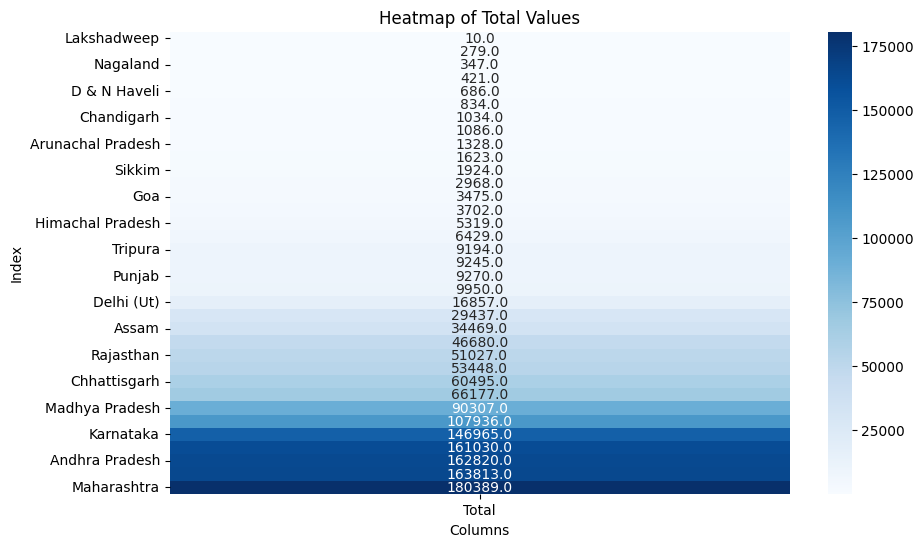

In [ ]:
state.sort_values(by='Total', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(state[['Total']], cmap='Blues', annot=True, fmt=".1f", cbar=True)

plt.title('Heatmap of Total Values')
plt.xlabel('Columns')
plt.ylabel('Index')

plt.show()

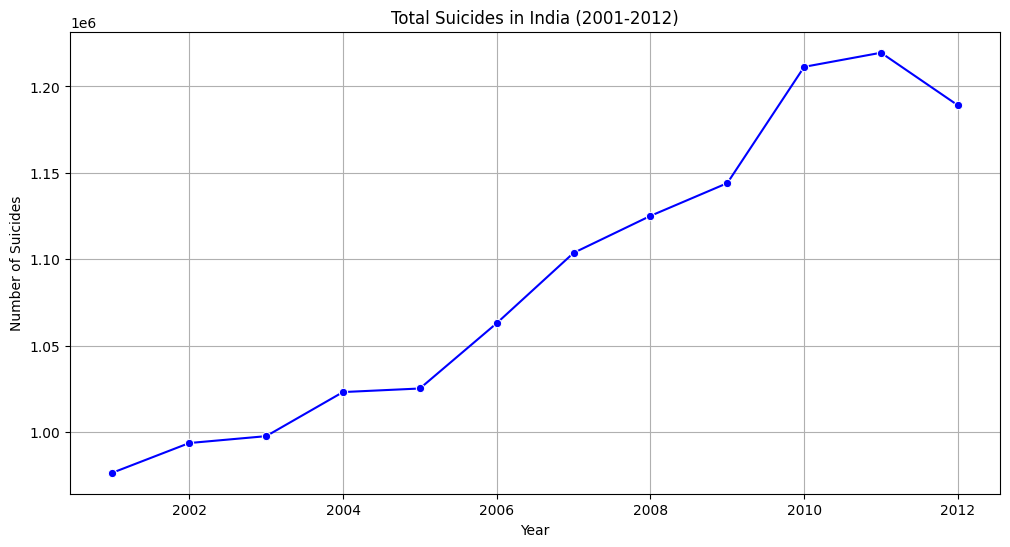

In [ ]:
# Group by Year and sum the Total suicides
annual_suicides = data.groupby('Year')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total', data=annual_suicides, marker='o', color='b')
plt.title('Total Suicides in India (2001-2012)')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid(True)
plt.show()

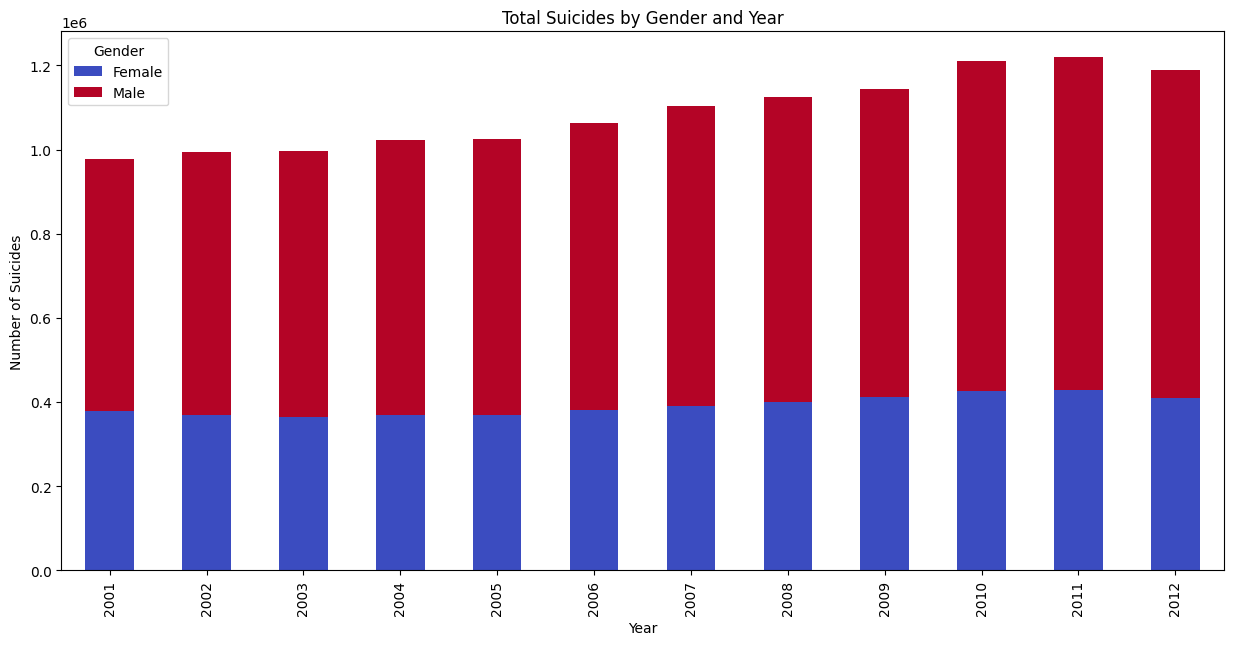

In [ ]:
# Group by Year and Gender and sum the Total suicides
gender_suicides = data.groupby(['Year', 'Gender'])['Total'].sum().unstack().fillna(0)

gender_suicides.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='coolwarm')
plt.title('Total Suicides by Gender and Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(title='Gender')
plt.show()

**Which States has the highest and the lowest suicide rate?**

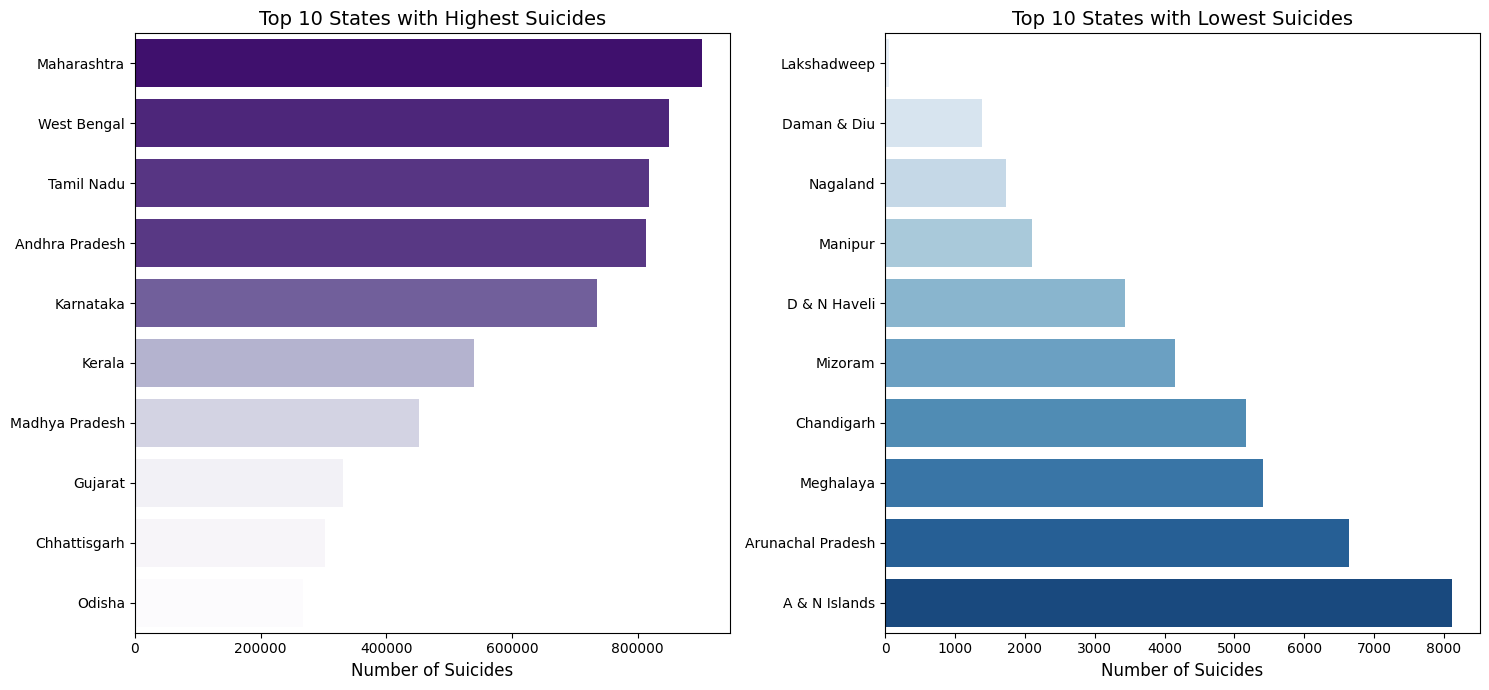

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

states_to_drop = ["Total (All India)", "Total (States)", "Total (Uts)"]
filtered_data = data[~data['State'].isin(states_to_drop)]

top_high_suicides = filtered_data.groupby("State")["Total"].sum().nlargest(10).reset_index()
top_low_suicides = filtered_data.groupby("State")["Total"].sum().nsmallest(10).reset_index()

norm = plt.Normalize(top_high_suicides['Total'].min(), top_high_suicides['Total'].max())
colors = plt.cm.Purples(norm(top_high_suicides['Total']))

sns.barplot(x='Total', y='State', data=top_high_suicides, ax=axes[0], palette=colors)
axes[0].set_title('Top 10 States with Highest Suicides', fontsize=14)
axes[0].set_xlabel('Number of Suicides', fontsize=12)
axes[0].set_ylabel('')

sns.barplot(x='Total', y='State', data=top_low_suicides, ax=axes[1], palette='Blues')
axes[1].set_title('Top 10 States with Lowest Suicides', fontsize=14)
axes[1].set_xlabel('Number of Suicides', fontsize=12)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


Observations

Maharashtra, West Bengal & Tamil Nadu are the states with highest suicide rates.
Nagaland, Manipur & Mizoram are the states with lowest suicide rates.
Union Territories has the lowest suicide rates (Lakshadweep, Daman & Diu).

**What are the most common reasons for committing suicide?**

Text(0.5, 1.0, 'Most common reasons for committing suicide')

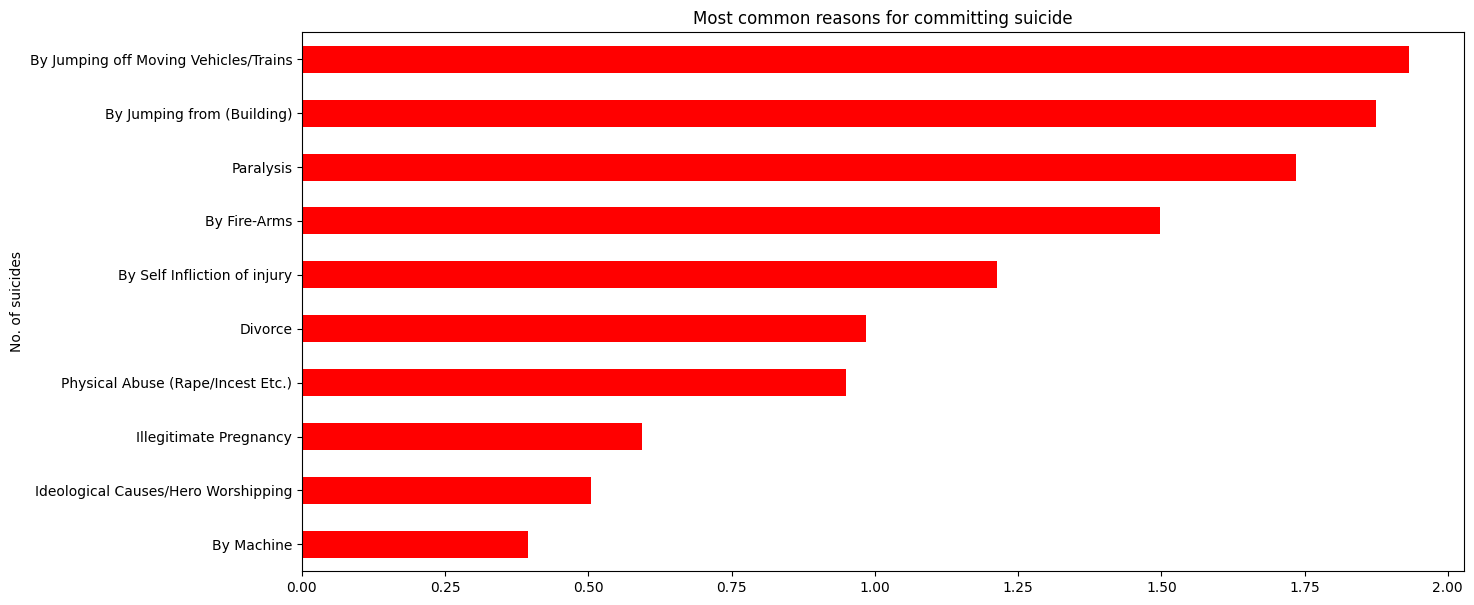

In [ ]:
data.groupby("Type")["Total"].mean().sort_values(ascending = True)[:10].plot(kind = "barh", color = "red", figsize = (15,7))
plt.ylabel("No. of suicides")
plt.title("Most common reasons for committing suicide")

Observations

Married people commit more suicide.
No education as well as less education are also the reason for committing suicide.

**What are the reasons for committing suicide in the top 3 states which has highest suicide rate?**

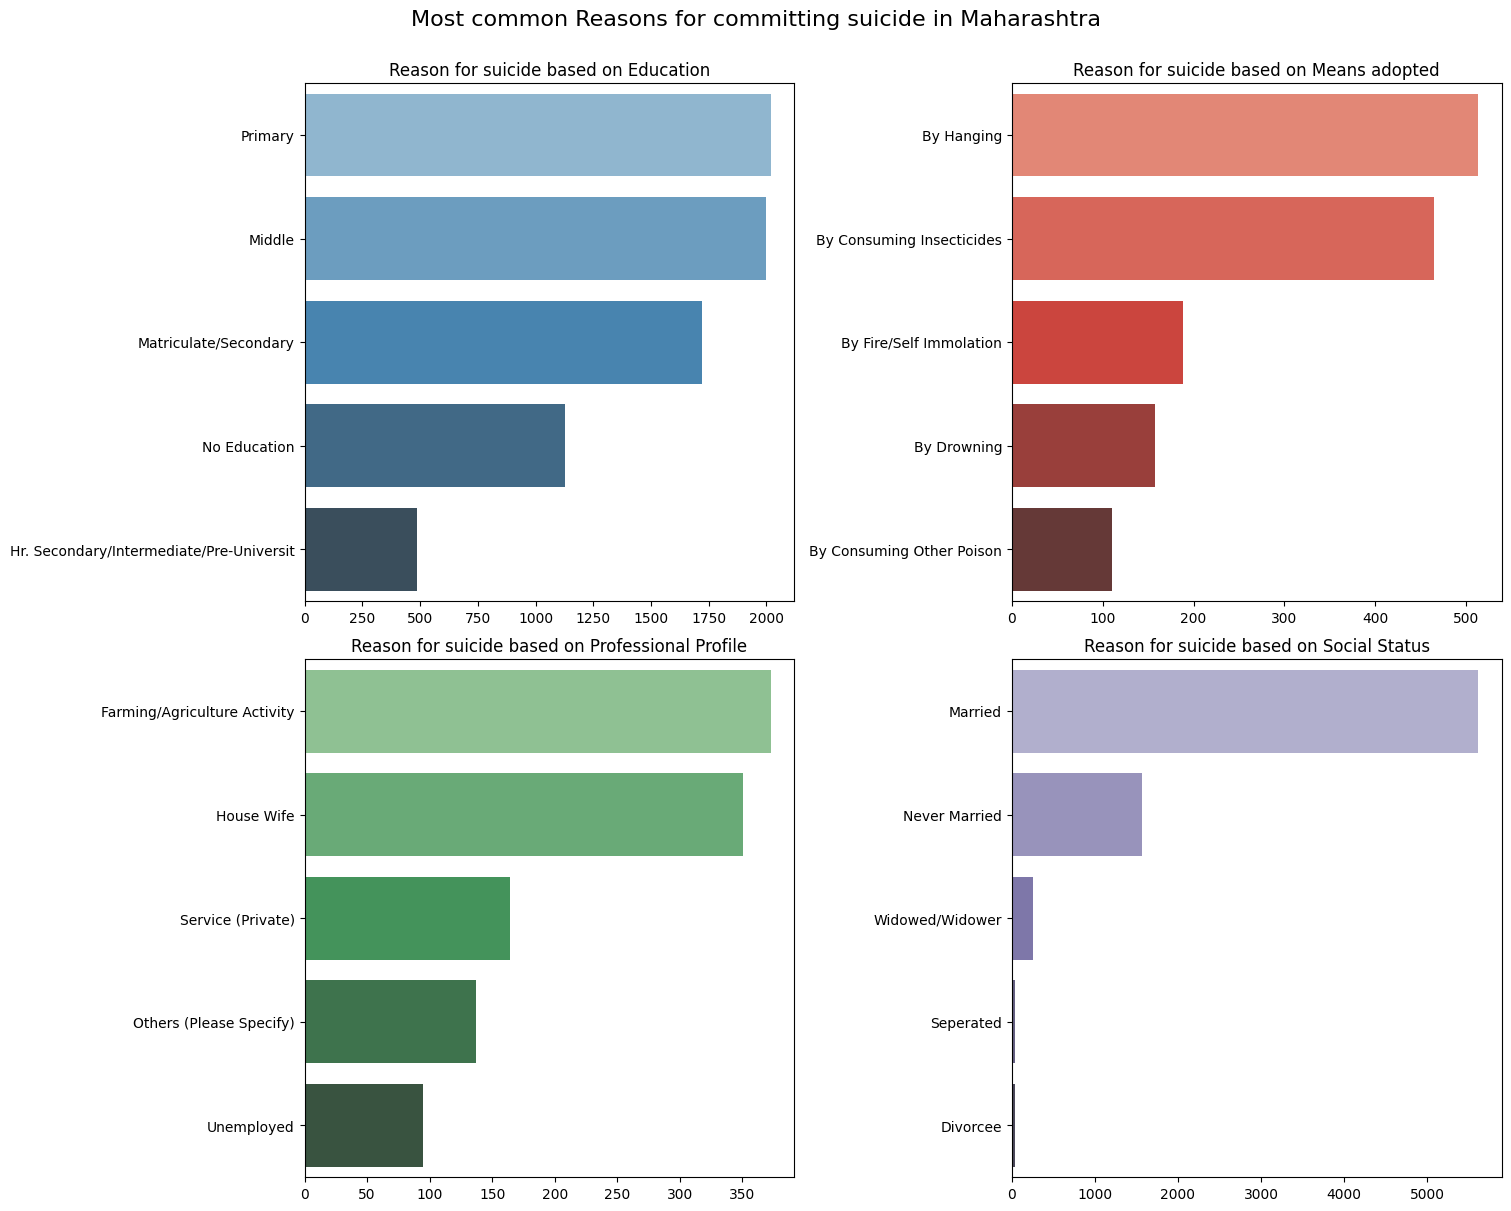

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for Maharashtra
mh = data[data["State"] == "Maharashtra"]
mh_cause = mh[mh["Type_code"] == "Causes"]
mh_edu = mh[mh["Type_code"] == "Education_Status"]
mh_adop = mh[mh["Type_code"] == "Means_adopted"]
mh_prof = mh[mh["Type_code"] == "Professional_Profile"]
mh_socio = mh[mh["Type_code"] == "Social_Status"]

fig, axes = plt.subplots(2, 2, figsize=(15, 12), constrained_layout=True)

sns.barplot(x=mh_edu.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5],
            y=mh_edu.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5].index,
            palette="Blues_d", ax=axes[0, 0])
axes[0, 0].set_title("Reason for suicide based on Education")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("")

sns.barplot(x=mh_adop.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5],
            y=mh_adop.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5].index,
            palette="Reds_d", ax=axes[0, 1])
axes[0, 1].set_title("Reason for suicide based on Means adopted")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("")

sns.barplot(x=mh_prof.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5],
            y=mh_prof.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5].index,
            palette="Greens_d", ax=axes[1, 0])
axes[1, 0].set_title("Reason for suicide based on Professional Profile")
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("")

sns.barplot(x=mh_socio.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5],
            y=mh_socio.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5].index,
            palette="Purples_d", ax=axes[1, 1])
axes[1, 1].set_title("Reason for suicide based on Social Status")
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("")

fig.suptitle("Most common Reasons for committing suicide in Maharashtra\n", fontsize=16)

plt.show()

Observations for Maharashtra

In terms of Education status, people with less education (Primary, Middle) commit more suicide.
In terms of Means Adopted, people commit more suicides by hanging and consuming insectidies.
In terms of Professional status, farmers commit more suicide.
In terms of Social status, married people are committing more suicide.

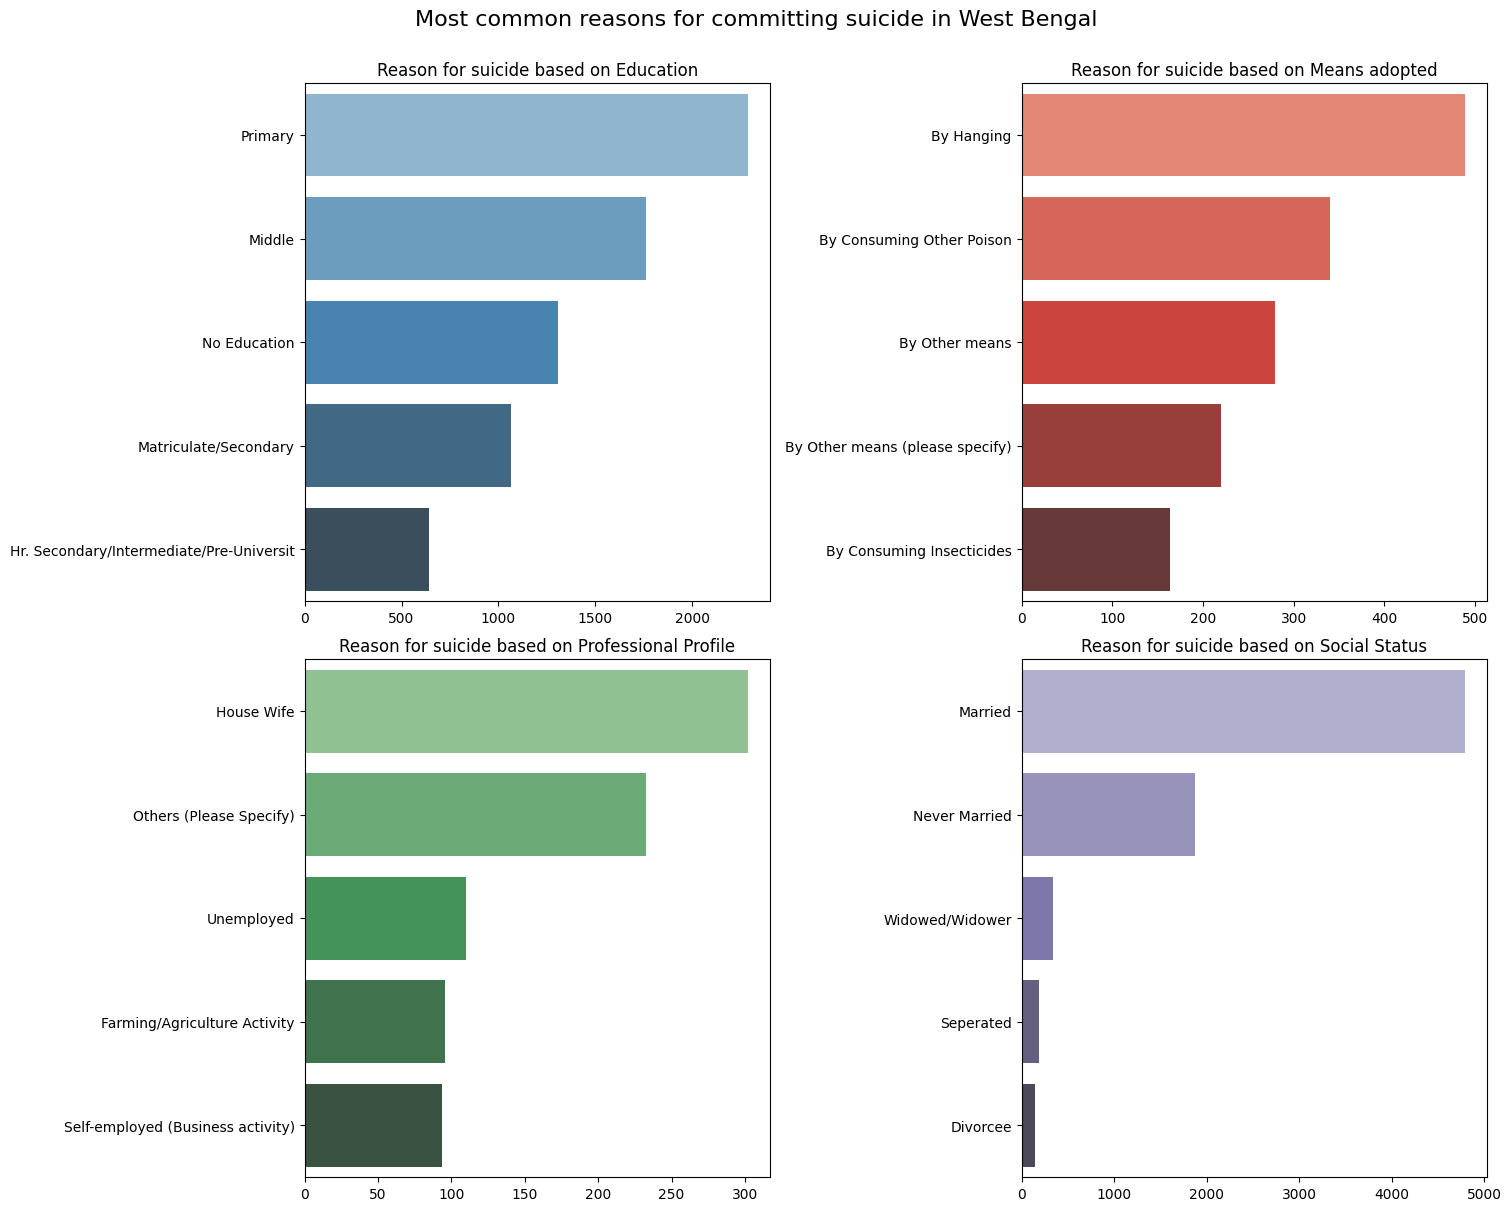

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wb = data[data["State"] == "West Bengal"]
wb_cause = wb[wb["Type_code"] == "Causes"]
wb_edu = wb[wb["Type_code"] == "Education_Status"]
wb_adop = wb[wb["Type_code"] == "Means_adopted"]
wb_prof = wb[wb["Type_code"] == "Professional_Profile"]
wb_socio = wb[wb["Type_code"] == "Social_Status"]

fig, axes = plt.subplots(2, 2, figsize=(15, 12), constrained_layout=True)

sns.barplot(x=wb_edu.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5], y=wb_edu.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5].index, palette="Blues_d", ax=axes[0, 0])
axes[0, 0].set_title("Reason for suicide based on Education")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("")

sns.barplot(x=wb_adop.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5], y=wb_adop.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5].index, palette="Reds_d", ax=axes[0, 1])
axes[0, 1].set_title("Reason for suicide based on Means adopted")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("")

sns.barplot(x=wb_prof.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5], y=wb_prof.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5].index, palette="Greens_d", ax=axes[1, 0])
axes[1, 0].set_title("Reason for suicide based on Professional Profile")
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("")

sns.barplot(x=wb_socio.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5], y=wb_socio.groupby("Type")["Total"].mean().sort_values(ascending=False)[:5].index, palette="Purples_d", ax=axes[1, 1])
axes[1, 1].set_title("Reason for suicide based on Social Status")
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("")

fig.suptitle("Most common reasons for committing suicide in West Bengal\n", fontsize=16)

plt.show()

Observations for West Bengal

In terms of Education status, people with less education (Primary, Middle) commit more suicide.
In terms of Means Adopted, people commit more suicides by hanging and consuming poison.
In terms of Professional status, housewives commit more suicide.
In terms of Social status, married people are committing more suicide.

**Analysis based on Age**

Which age group commits more suicide?

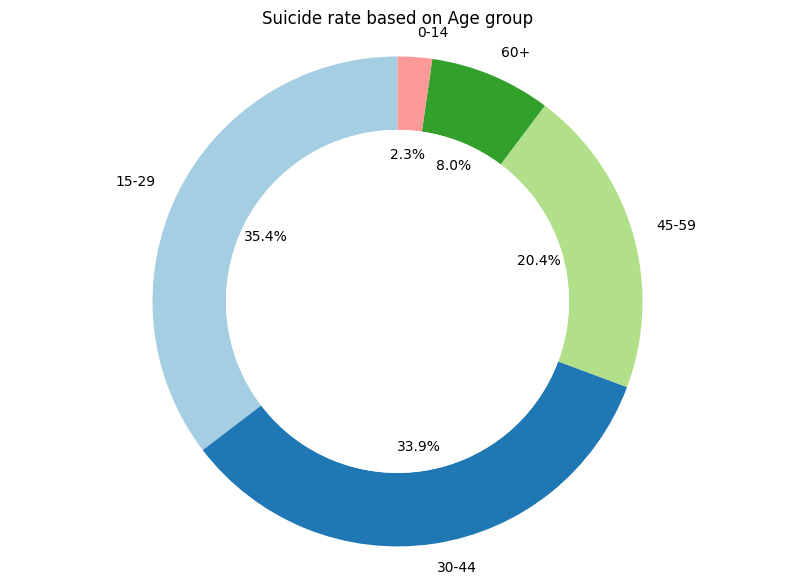

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_Age = data[(data["Age_group"] != "0-100+") & (data["Total"] > 0)]

age_group_totals = df_Age.groupby("Age_group")["Total"].sum().sort_values(ascending=False)

labels = age_group_totals.index
sizes = age_group_totals.values

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title("Suicide rate based on Age group")

plt.show()

In [ ]:
data.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [ ]:
data.dtypes

,0
State,object
Year,int64
Type_code,object
Type,object
Gender,object
Age_group,object
Total,int64


In [ ]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [ ]:
clean_data = data.copy()

Performed label encoding to convert categorical into numerical

In [ ]:
columns = ['State', 'Type_code', 'Type', 'Gender', 'Age_group']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns:
    clean_data[col] = le.fit_transform(clean_data[col])

clean_data.tail()


,State,Year,Type_code,Type,Gender,Age_group,Total
237514,37,2012,4,61,1,0,149
237515,37,2012,4,68,1,0,233
237516,37,2012,4,40,1,0,5451
237517,37,2012,4,25,1,0,189
237518,37,2012,4,43,1,0,2658


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   State      237519 non-null  int64
 1   Year       237519 non-null  int64
 2   Type_code  237519 non-null  int64
 3   Type       237519 non-null  int64
 4   Gender     237519 non-null  int64
 5   Age_group  237519 non-null  int64
 6   Total      237519 non-null  int64
dtypes: int64(7)
memory usage: 12.7 MB


Getting independent and dependent variables

In [ ]:
y = clean_data['Total']
X = clean_data.drop('Total', axis=1)

splitting train and test splits

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((190015, 6), (47504, 6))

Performing the normalization using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Building up different models

Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=9)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
y_pred_dt = dt.predict(X_test_scaled)

Evaluation metrics for decision tree

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_dt)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred_dt)
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 31.87
Mean Squared Error (MSE): 15096.60
Root Mean Squared Error (RMSE): 122.87
R² Score: 0.98


Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [2,5]
}

lr = LinearRegression()


grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [2, 5]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_lr = grid_search.predict(X_test_scaled)

Evaluation metrics for linear regression

In [ ]:

mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred_lr)
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 115.31
Mean Squared Error (MSE): 625552.11
Root Mean Squared Error (RMSE): 790.92
R² Score: 0.01


Randomforest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=9)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=9)

In [ ]:
y_pref_rf = rf.predict(X_test_scaled)

Evaluation metrics for random forest

In [ ]:

mae = mean_absolute_error(y_test, y_pref_rf)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pref_rf)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pref_rf)
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 30.04
Mean Squared Error (MSE): 11657.95
Root Mean Squared Error (RMSE): 107.97
R² Score: 0.98


XGboost regression model

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test_scaled)

Evaluation metrics for xgboost

In [ ]:

mae = mean_absolute_error(y_test, y_pred_xgb)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred_xgb)
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 47.61
Mean Squared Error (MSE): 77842.81
Root Mean Squared Error (RMSE): 279.00
R² Score: 0.88


KNeighborsRegressor model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)

Evalaution metrics for KNeighbourregressor

In [ ]:

mae = mean_absolute_error(y_test, y_pred_knn)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred_knn)
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 62.11
Mean Squared Error (MSE): 363800.29
Root Mean Squared Error (RMSE): 603.16
R² Score: 0.42


Hyperparameter tuning for Kneighbour Regressor

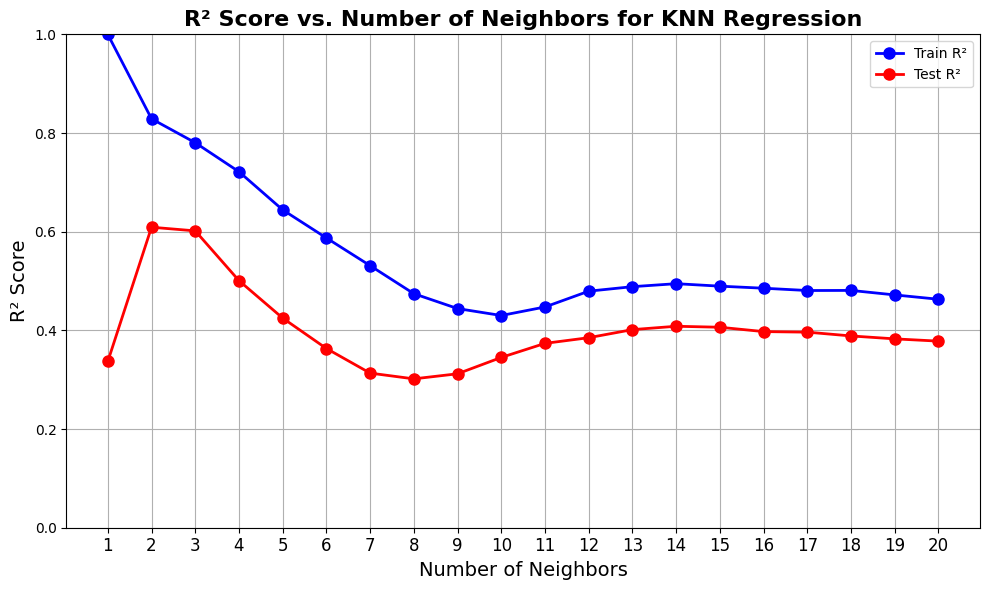

In [ ]:
import matplotlib.pyplot as plt

neighbors_range = range(1, 21)
train_r2_scores = []
test_r2_scores = []

for n_neighbors in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)

    y_pred_train = knn.predict(X_train_scaled)
    y_pred_test = knn.predict(X_test_scaled)

    train_r2 = knn.score(X_train_scaled, y_train)
    test_r2 = r2_score(y_test, y_pred_test)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_r2_scores, marker='o', label='Train R²', color='blue', linestyle='-', markersize=8, linewidth=2)
plt.plot(neighbors_range, test_r2_scores, marker='o', label='Test R²', color='red', linestyle='-', markersize=8, linewidth=2)

plt.title('R² Score vs. Number of Neighbors for KNN Regression', fontsize=16, fontweight='bold')
plt.xlabel('Number of Neighbors', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(neighbors_range, fontsize=12)
plt.ylim(0, 1)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


Changed the no of the n_neighbours based on above graph

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)

Evalaution metrics for knn

In [ ]:

mae = mean_absolute_error(y_test, y_pred_knn)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred_knn)
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 56.95
Mean Squared Error (MSE): 251976.21
Root Mean Squared Error (RMSE): 501.97
R² Score: 0.60


Pipeline with polynomial features and using grid search to get best parameters

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score


# Pipeline with Polynomial Features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # To add interaction terms and polynomials
    ('lr', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3],  # Polynomial degrees
    'lr__fit_intercept': [True, False],
    'lr__n_jobs': [None, 2, 5],  # Include None for single-threaded runs
    'lr__positive': [True, False]  # Ensure coefficients remain positive
}

# Custom Scoring (Optional)
custom_scorer = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # Change to your preferred metric
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate Performance on Test Data
y_pred_lr = grid_search.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred_lr)
print(f"R² Score: {r2:.2f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'lr__fit_intercept': False, 'lr__n_jobs': None, 'lr__positive': False, 'poly__degree': 3}
Mean Absolute Error (MAE): 125.98
Mean Squared Error (MSE): 589527.09
Root Mean Squared Error (RMSE): 767.81
R² Score: 0.07


Hyperparameter tuning for lasso regression model to get best alpha. Also performed the evalaution metrics.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the Lasso regression model
lasso = Lasso(max_iter=100)

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']  # Strategies for coefficient updates
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Change if needed
    cv=5,
    verbose=1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict on the test set
y_pred_lasso = grid_search.predict(X_test_scaled)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred_lasso)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred_lasso)
print(f"R² Score: {r2:.2f}")


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters: {'alpha': 0.01, 'fit_intercept': True, 'selection': 'random'}
Mean Absolute Error (MAE): 115.30
Mean Squared Error (MSE): 625552.13
Root Mean Squared Error (RMSE): 790.92
R² Score: 0.01


#**Conclusion**

By above models, we can see that the decision tree is the best model with highest R2 of 0.98.

Mean Absolute Error (MAE): 31.87

Mean Squared Error (MSE): 15096.60

Root Mean Squared Error (RMSE): 122.87

R² Score: 0.98